In [22]:
import numpy as np
import matplotlib.pyplot as plt
from pupil_apriltags import Detector, Detection
import cv2

In [2]:
camera_matrix = np.array([[1.95512684e+03, 0.00000000e+00, 9.99979035e+02],
       [0.00000000e+00, 1.96894288e+03, 7.03714795e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [3]:
distortion_coeffs = np.array([[ 4.72405034e-02, -1.36893654e+00, -4.76959930e-03,
        -1.47286807e-03,  5.14401528e+00]])

In [40]:
img = cv2.imread("tags/alltags_lowlight.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

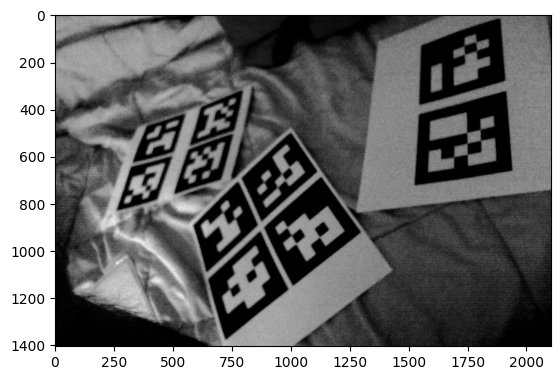

In [41]:
plt.imshow(img_gray, cmap="gray")

In [42]:
at_detector = Detector(
   families="tag25h9",
   nthreads=1,
   quad_decimate=1.0,
   quad_sigma=0.0,
   refine_edges=1,
   decode_sharpening=0.25,
   debug=0
)

In [43]:
output = at_detector.detect(img_gray)
output[0]

Detection object:
tag_family = b'tag25h9'
tag_id = 4
hamming = 0
decision_margin = 44.11991500854492
homography = [[ 8.21212396e+01 -8.74129585e+00  7.11749923e+02]
 [-1.19901927e+02  4.23893167e+01  8.90786605e+02]
 [-2.60508131e-02 -6.08153961e-02  1.00000000e+00]]
center = [711.74992287 890.78660498]
corners = [[ 643.24969482 1091.00622559]
 [ 859.8190918   890.64056396]
 [ 775.6473999   704.02038574]
 [ 587.34918213  890.90930176]]
pose_R = None
pose_t = None
pose_err = None

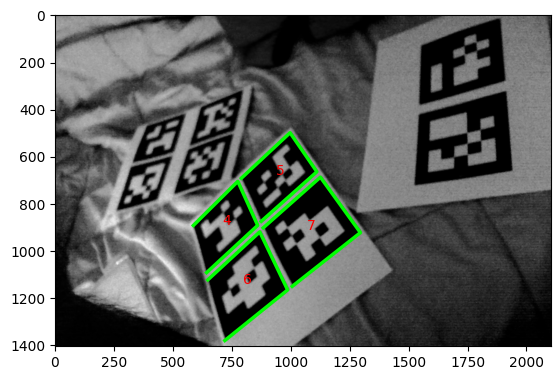

In [44]:
plt.imshow(img_gray, cmap="gray")
for det in output:
    curr_corners = det.corners
    plt.plot(curr_corners[:,0], curr_corners[:,1], color="lime", linewidth=2.5)
    plt.text(det.center[0], det.center[1], f"{det.tag_id}", color="red")